# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_data['data']['1']['quotes']['USD']['price']
my_eth_value = eth_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36433.00
The current value of your 5.3 ETH is $2524.21


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-05-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                     SPY  \
                             open    high    low   close   volume    open   
time                                                                        
2021-05-28 00:00:00-04:00  114.55  114.68  114.5  114.51  6186451  420.97   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-28 00:00:00-04:00  421.25  419.79  420.02  49200328

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.51
Current SPY closing price: $420.02


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21001.00
The current value of your 200 AGG shares is $22902.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
stocks_value = my_agg_value + my_spy_value

portfolio = [{"crypto": crypto_value,
              "shares": stocks_value }]

df_savings1 = pd.DataFrame(portfolio)

df_savings = df_savings1.transpose(copy = False)
df_savings.columns = ["Amount"]

# Display savings DataFrame
display(df_savings)

,Amount
crypto,38957.21
shares,43903.00


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='Amount'>

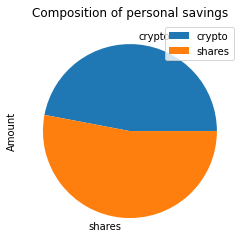

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y=0, title = "Composition of personal savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Amount"].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough money in your rainy-day fund.")
elif total_savings < emergency_fund:
    print(f"You are $ {emergency_fund - total_savings} away from reaching your goal of saving at least 3 times your monthly expenses")
else:
    print("Congratulations, you have reached your goal of saving at least 3 times your monthly expenses")

Congratulations, you have enough money in your rainy-day fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-28', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-01-06 00:00:00-05:00  117.90  117.9000  117.1500  117.36  8587136   
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.21  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.09  5580443   
2021-01-11 00:00:00-05:00  117.02  117.0500  116.8900  116.89  5047096   
2021-01-12 00:00:00-05:00  116.82  116.9900  116.6800  116.98  5103382   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-01-06 00:00:00-05:00  369.71  376.98  369.1200  373.53  91989131  
2021-01-07 00:00:00-05:00  376.10  379.90  375.9100  379.06  58862006  
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466  
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74  44814805  
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81  45364896

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-01-06 00:00:00-05:00  117.90  117.9000  117.1500  117.36  8587136   
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.21  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.09  5580443   
2021-01-11 00:00:00-05:00  117.02  117.0500  116.8900  116.89  5047096   
2021-01-12 00:00:00-05:00  116.82  116.9900  116.6800  116.98  5103382   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-01-06 00:00:00-05:00          NaN  369.71  376.98  369.1200  373.53   
2021-01-07 00:00:00-05:00    -0.001278  376.10  379.90  375.9100  379.06   
2021-01-08 00:00:00-05:00    -0.001024  380.59  381.49  377.1000  381.24   
2021-01-11 00:00:00-05:00    -0.001708  377.85  380.58  377.7189  378.74   
2021-01-12 00:00:00-05:00     0.000770  378.89  379.86  376.3600  378.81   

                                                  
                             volume daily_return  
time                                              
2021-01-06 00:00:00-05:00  91989131          NaN  
2021-01-07 00:00:00-05:00  58862006     0.014805  
2021-01-08 00:00:00-05:00  60275466     0.005751  
2021-01-11 00:00:00-05:00  44814805    -0.006558  
2021-01-12 00:00:00-05:00  45364896     0.000185

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002640,0.990002,0.988521,1.003832,0.994138,0.999374,1.003967,0.994938,0.990069,0.994554,...,0.998490,1.001080,0.997411,1.003135,1.000521,1.012522,1.006309,1.000966,0.988804,1.000242
2,0.992544,1.001160,0.983992,1.001306,0.990072,1.000907,1.004027,0.995982,0.991101,0.996145,...,1.009198,1.002075,0.990027,1.010920,0.996309,1.020950,1.004076,1.005839,0.991339,1.000555
3,0.987070,1.006413,0.982025,1.009664,0.991012,0.995591,1.011242,1.000967,0.992105,1.000716,...,1.017645,0.997084,0.998447,1.002550,0.995547,1.018769,1.015723,1.013786,0.999533,0.998061
4,0.986248,1.001877,0.981324,1.013292,0.988098,1.000392,1.017064,1.000602,0.997292,1.004118,...,1.017033,0.998057,0.999380,1.005315,1.005800,1.019623,1.016679,1.012438,0.995151,1.001131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,60.507767,50.174980,45.014165,70.467100,141.805592,167.969669,92.402373,31.818656,96.971443,134.184017,...,102.887376,68.200411,52.868269,112.084508,217.242121,126.784855,225.002222,49.957444,166.502443,115.592552
7557,60.305271,50.154661,45.159626,70.465371,141.064336,167.970276,92.488418,31.816671,96.624761,134.772356,...,102.469770,68.833864,52.510916,113.578255,214.327316,128.036042,225.415510,49.915200,165.993703,114.730252
7558,59.925804,50.715095,45.223927,70.927330,139.999102,167.394100,93.327515,31.948616,96.419537,133.727900,...,102.767758,69.272546,52.101459,114.842860,211.580713,127.319571,226.510622,50.111677,167.556443,115.824679
7559,60.008164,50.956736,45.016349,70.418128,140.448819,167.211267,92.613102,32.103018,96.360706,133.257472,...,102.605073,68.783839,51.659308,114.525066,211.725323,127.424413,225.930504,49.815749,168.377563,115.617587


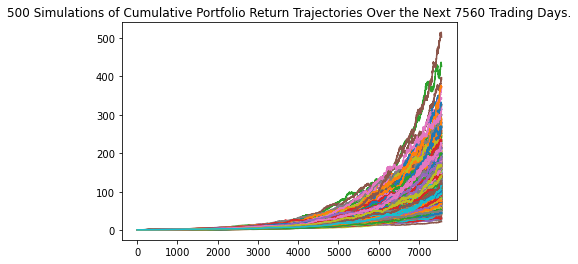

In [19]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

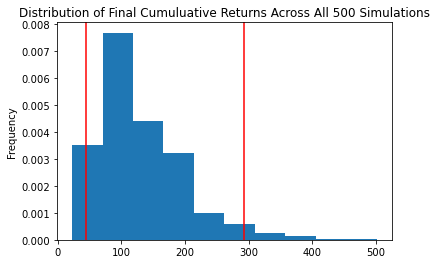

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean            128.997594
std              67.002633
min              22.421665
25%              82.295076
50%             114.684415
75%             166.532622
max             501.490190
95% CI Lower     44.163612
95% CI Upper    293.432043
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $883272.24 and $5868640.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment_new,2)
ci_upper = round(summary_stats[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1324908.36 and $8802961.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992748,1.006622,0.994539,0.995879,0.999355,1.005608,1.006062,1.001564,1.008359,1.000233,...,0.996904,0.991023,1.007007,0.994073,1.007565,0.998084,1.000761,0.996930,1.009279,1.001113
2,0.987854,1.003059,0.993223,0.991713,1.004279,1.003768,0.996901,1.000401,1.012073,1.005471,...,0.993728,0.997500,1.007131,0.989305,1.005763,0.996832,1.007765,0.998588,1.001745,1.000570
3,0.984185,0.998630,0.985986,0.994876,1.000980,0.995421,0.993881,0.999445,1.001286,1.006219,...,1.005390,1.001581,1.000815,0.988935,1.008915,0.997590,1.011893,0.990935,1.001797,1.005106
4,0.990866,0.993834,0.993490,1.005697,1.006717,0.998568,0.992524,0.999221,0.991556,1.005559,...,1.004445,1.003673,0.992195,0.985016,1.011714,0.995527,1.014220,0.990380,1.001522,0.998659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.239939,1.824071,2.460628,2.136598,1.859939,2.260155,2.698280,1.926169,2.139143,2.121232,...,2.252572,1.790574,2.342516,2.459239,2.237604,2.129690,2.051795,1.698961,1.460547,2.435472
1257,4.212230,1.810564,2.463458,2.154188,1.883915,2.266980,2.710892,1.926210,2.145016,2.142046,...,2.261137,1.785131,2.348164,2.450032,2.247695,2.146470,2.053083,1.690570,1.454699,2.443139
1258,4.264271,1.810083,2.433598,2.172094,1.880268,2.275844,2.702362,1.918596,2.129744,2.148210,...,2.293135,1.776780,2.354215,2.472301,2.249330,2.156393,2.069997,1.701624,1.445350,2.474864
1259,4.231088,1.802221,2.441140,2.175304,1.877792,2.267942,2.703519,1.924294,2.125117,2.153038,...,2.312823,1.774532,2.361200,2.465230,2.244195,2.159708,2.057463,1.700368,1.444654,2.479242


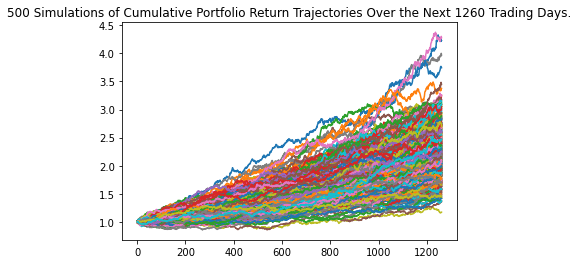

In [26]:
# Plot simulation outcomes
line_plot_5year = MC_5year.plot_simulation()

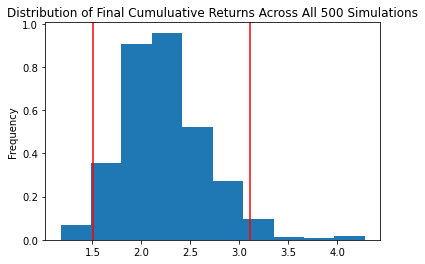

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_5year = MC_5year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5year = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5year)

count           500.000000
mean              2.228658
std               0.429360
min               1.174306
25%               1.932362
50%               2.182656
75%               2.465234
max               4.279363
95% CI Lower      1.500830
95% CI Upper      3.109329
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_5year = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5year = round(summary_stats_5year[8]*initial_investment_5year,2)
ci_upper_5year = round(summary_stats_5year[9]*initial_investment_5year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5year} and ${ci_upper_5year}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $60033.19 and $124373.16


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006960,0.997237,1.006518,0.996990,0.999836,0.992582,0.999747,1.003756,0.988634,0.987473,...,0.989960,0.998955,1.006356,0.997810,1.005817,0.996855,1.002156,0.994134,1.005937,0.991573
2,1.007707,1.004239,1.009513,0.992935,0.999971,0.989704,1.004512,1.007906,0.993166,0.987214,...,0.987350,1.000401,1.010852,0.997746,1.008186,1.002162,0.996579,1.005674,1.005394,0.988803
3,1.015672,1.006715,1.011351,0.989013,0.998138,0.989420,1.005263,1.006958,0.991794,0.996760,...,0.984216,0.996385,1.019562,0.996388,1.006756,1.005237,0.993044,1.015720,1.008098,0.988390
4,1.014428,1.006561,1.004288,0.992753,0.994791,0.995403,1.005425,1.002551,0.999870,0.997224,...,0.981599,0.997624,1.023653,1.002026,1.010765,1.015125,1.001251,1.030609,1.005000,0.994839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.360438,7.760236,5.409749,4.804474,4.688264,7.994694,3.361575,4.926914,4.462977,5.112424,...,4.277891,3.838633,5.667317,7.670230,4.269140,4.282343,6.773804,8.802638,5.306923,6.465006
2517,3.376765,7.755265,5.416908,4.772488,4.674531,7.953226,3.370460,4.944556,4.445812,5.109525,...,4.264310,3.877998,5.661070,7.616282,4.254660,4.285627,6.793950,8.821586,5.249533,6.495262
2518,3.410845,7.786344,5.419902,4.748679,4.675624,7.981770,3.370306,4.959034,4.466940,5.127326,...,4.236972,3.871470,5.646641,7.633725,4.262102,4.316185,6.789279,8.810840,5.209176,6.471872
2519,3.391941,7.732359,5.405523,4.742630,4.617929,8.004972,3.385363,4.948239,4.497892,5.166254,...,4.205349,3.885766,5.612927,7.728462,4.246315,4.338958,6.754069,8.748671,5.261575,6.459632


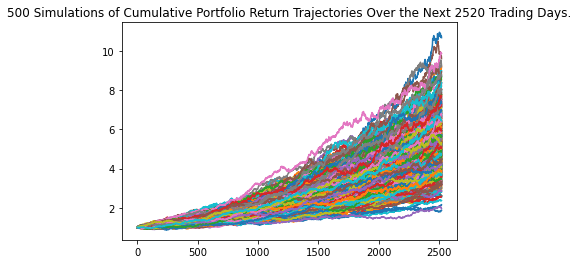

In [32]:
# Plot simulation outcomes
line_plot_10year = MC_10year.plot_simulation()

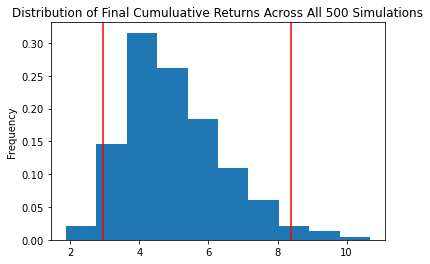

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_10year = MC_10year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10year = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10year)

count           500.000000
mean              5.035711
std               1.424917
min               1.868421
25%               4.021044
50%               4.754111
75%               5.885835
max              10.680988
95% CI Lower      2.935513
95% CI Upper      8.387270
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_10year = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10year = round(summary_stats_10year[8]*initial_investment_10year,2)
ci_upper_10year = round(summary_stats_10year[9]*initial_investment_10year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10year} and ${ci_upper_10year}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $117420.53 and $335490.79
